# Simple Linear Regression Model with a Neural Network  
In this network we will create a linear regression model with NN 

In [1]:
# import libraries 
import torch 
from torch import nn 
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm 

In [2]:
# import the data - this was created with the prior notebook.  y = 2.5M + 3 + e
fileIn = '/mnt/thumb/LLM_Stuff/notebooks/data/sample_data.csv'
df = pd.read_csv(fileIn)
df.head()

,M,X,B,e,y
0,2.5,0,3,-13.366893,-10.366893
1,2.5,1,3,37.309246,42.809246
2,2.5,2,3,-15.015369,-7.015369
3,2.5,3,3,45.163731,55.663731
4,2.5,4,3,11.095344,24.095344


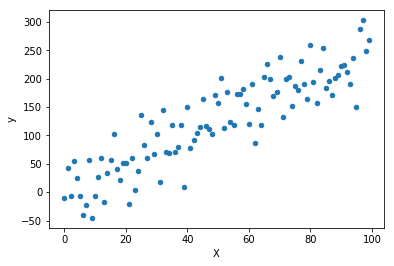

In [3]:
# plot the X,y coordinates 
df.plot.scatter('X', 'y')

In [4]:
# create the model 

class SimpleLinearRegression(nn.Module): 
    
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.tensor(1.0), requires_grad=True)
        self.bias = nn.Parameter(torch.tensor(1.0), requires_grad=True)
        self.double()
        
    def forward(self, data: torch.tensor) -> torch.Tensor:
        return self.weights * data + self.bias 
    

In [5]:
# instantiate the model 
model = SimpleLinearRegression()

In [6]:
model

SimpleLinearRegression()

In [7]:
# take a peek inside 
for name, param in model.named_parameters(): 
    print(name, param.data)

weights tensor(1., dtype=torch.float64)
bias tensor(1., dtype=torch.float64)


In [8]:
# create tensors with the data 
X = torch.tensor(df.X.to_numpy())
y = torch.tensor(df.y.to_numpy())
X.shape, y.shape


(torch.Size([100]), torch.Size([100]))

In [9]:
# Make your intial niaeve predictions (no processing has occurred) 
pred_y = model(X)

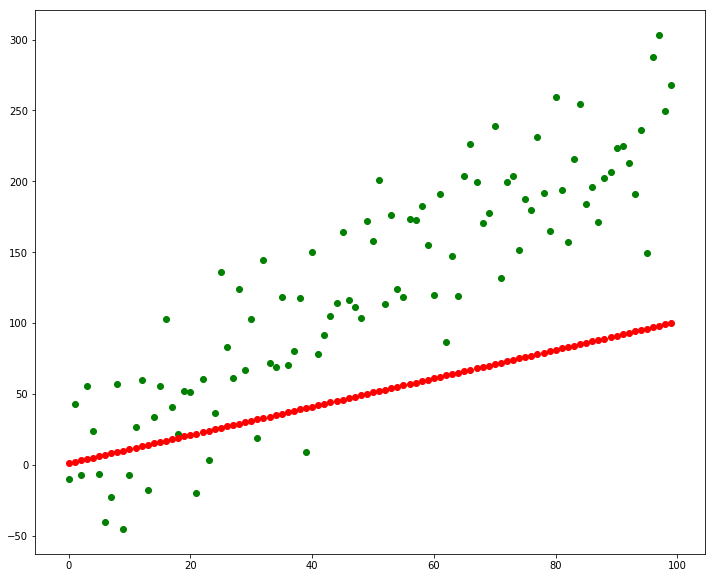

In [10]:
# plot the untrained model 
plt.figure(figsize=(12,10))
plt.scatter(X.detach().numpy(), y.detach().numpy(), color="g")
plt.scatter(X.detach().numpy(), pred_y.detach().numpy(), color="r")

## Training Section 

In [11]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [12]:
losses = []
for i in tqdm(range(100_000)):
    pred_y = model(X)
    
    loss = loss_fn(pred_y, y)
    if i % 10000 == 0: 
        losses.append(loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()             
              

100%|██████████| 100000/100000 [01:54<00:00, 876.37it/s]


## Model Evaluation 

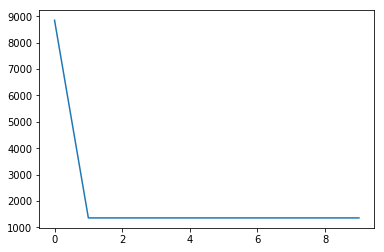

In [13]:
# Plot your losses 
plt.plot(losses)

## Evaluate Predictions 

In [14]:
# look at current weights 
for name, param in model.named_parameters(): 
    print(name, param.data)

weights tensor(2.5233, dtype=torch.float64)
bias tensor(0.1485, dtype=torch.float64)


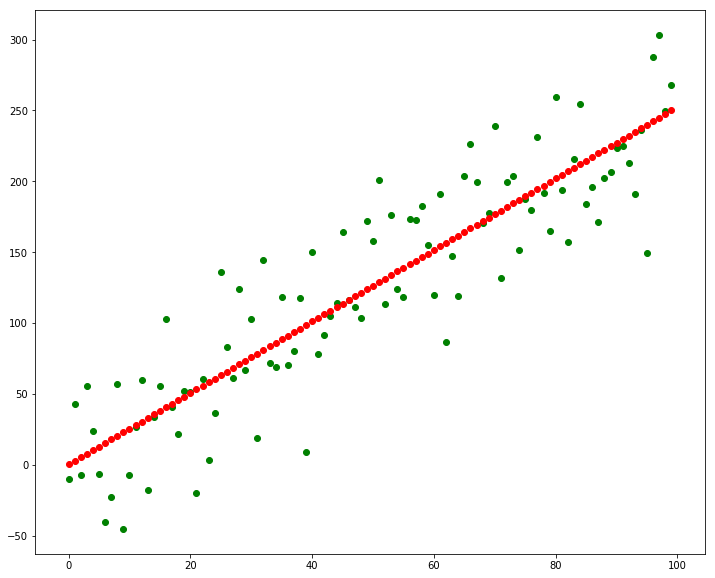

In [16]:
# Plot the trained model
plt.figure(figsize=(12,10))
plt.scatter(X.detach().numpy(), y.detach().numpy(), color="g")
plt.scatter(X.detach().numpy(), pred_y.detach().numpy(), color="r")